In [3]:
from java_parser import get_unit_test_files, get_target_files
from file_metrics import get_test_history, get_diff_of_file, get_added_lines_file
from plot_utils import plot_lines_test_vs_target_normalise_100, plot_lines_test_vs_target_dates, plot_test_vs_target_metric_numeric
from matplotlib import pyplot as plt
repo_path = "/Users/david/development/ucl/soft_prac/apache_repos/maven-resolver"

In [4]:
all_test_files = get_unit_test_files(repo_path)
map_files = get_target_files(repo_path, all_test_files)
map_before, map_same, map_after = get_test_history(repo_path, map_files)

Total number of test files:  156
Total number of target files found:  133


In [5]:
print("Before: " + str(len(map_before)))
print("Same: " + str(len(map_same)))
print("After: " + str(len(map_after)))


test_date = map_before[0]['test_date']
target_date = map_before[0]['target_date']
print("Test date: " + str(test_date))
print("Target date: " + str(target_date))

Before: 1
Same: 119
After: 13
Test date: 2016-09-03 22:23:01+02:00
Target date: 2022-10-25 10:23:35+02:00


# Files where test are created before the target file

## Diff of the test file and the target file

In [6]:

def get_diffs_of_file(repo_path, pair_test_target):
    test_file = pair_test_target['test']
    target_file = pair_test_target['target']
    diffs_test = get_diff_of_file(repo_path, test_file)
    diffs_target = get_diff_of_file(repo_path, target_file)
    return {'test': diffs_test, 'target': diffs_target}

diffs_before = get_diffs_of_file(repo_path, map_before[0])
print(diffs_before['test'])

[{'file': '/Users/david/development/ucl/soft_prac/apache_repos/maven-resolver/maven-resolver-test-util/src/main/java/org/eclipse/aether/internal/test/util/TestFileUtils.java', 'commit': '39b91eedd2e22dd8bda287170f0d1d8598975f8d', 'date': datetime.datetime(2023, 8, 1, 13, 33, 6, tzinfo=datetime.timezone(datetime.timedelta(seconds=7200))), 'count': 5, 'maximum': 5, 'average': 5}, {'file': '/Users/david/development/ucl/soft_prac/apache_repos/maven-resolver/maven-resolver-test-util/src/main/java/org/eclipse/aether/internal/test/util/TestFileUtils.java', 'commit': '97dfd1c2b9deb15734d5e401807e55cd0498332a', 'date': datetime.datetime(2023, 2, 20, 10, 2, 32, tzinfo=datetime.timezone(datetime.timedelta(seconds=3600))), 'count': -94, 'maximum': -94, 'average': -94}, {'file': '/Users/david/development/ucl/soft_prac/apache_repos/maven-resolver/maven-resolver-test-util/src/main/java/org/eclipse/aether/internal/test/util/TestFileUtils.java', 'commit': 'ee6aa7e11f24e802a33d8692ee8db5e9e8e9c842', 'da

In [7]:
print(diffs_before['test'][0])
print(diffs_before['target'][0])

{'file': '/Users/david/development/ucl/soft_prac/apache_repos/maven-resolver/maven-resolver-test-util/src/main/java/org/eclipse/aether/internal/test/util/TestFileUtils.java', 'commit': '39b91eedd2e22dd8bda287170f0d1d8598975f8d', 'date': datetime.datetime(2023, 8, 1, 13, 33, 6, tzinfo=datetime.timezone(datetime.timedelta(seconds=7200))), 'count': 5, 'maximum': 5, 'average': 5}
{'file': '/Users/david/development/ucl/soft_prac/apache_repos/maven-resolver/maven-resolver-util/src/main/java/org/eclipse/aether/util/FileUtils.java', 'commit': '17e2fdb5c748be96e4d32306ba7342fc2b5e944d', 'date': datetime.datetime(2023, 11, 22, 15, 5, 3, tzinfo=datetime.timezone(datetime.timedelta(seconds=3600))), 'count': -26, 'maximum': -26, 'average': -26}


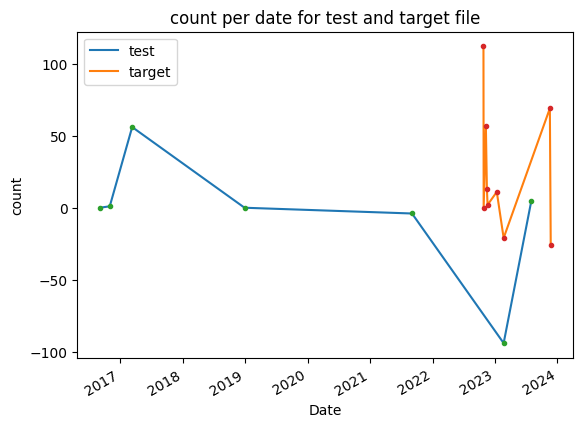

In [9]:

plot_lines_test_vs_target_dates(diffs_before['test'], diffs_before['target'], "count")


## Add lines to the test file vs the target file

In [10]:
def get_added_lines_pair(repo_path, pair_test_target):
    test_file = pair_test_target['test']
    target_file = pair_test_target['target']
    diffs_test = get_added_lines_file(repo_path, test_file)
    diffs_target = get_added_lines_file(repo_path, target_file)
    return {'test': diffs_test, 'target': diffs_target}


[{'file': '/Users/david/development/ucl/soft_prac/apache_repos/maven-resolver/maven-resolver-test-util/src/main/java/org/eclipse/aether/internal/test/util/TestFileUtils.java', 'commit': '39b91eedd2e22dd8bda287170f0d1d8598975f8d', 'date': datetime.datetime(2023, 8, 1, 13, 33, 6, tzinfo=datetime.timezone(datetime.timedelta(seconds=7200))), 'lines_count': 5, 'lines_added_count': 5, 'lines_added_max': 5, 'lines_added_avg': 5, 'lines_removed_count': 0, 'lines_removed_max': 0, 'lines_removed_avg': 0}, {'file': '/Users/david/development/ucl/soft_prac/apache_repos/maven-resolver/maven-resolver-test-util/src/main/java/org/eclipse/aether/internal/test/util/TestFileUtils.java', 'commit': '97dfd1c2b9deb15734d5e401807e55cd0498332a', 'date': datetime.datetime(2023, 2, 20, 10, 2, 32, tzinfo=datetime.timezone(datetime.timedelta(seconds=3600))), 'lines_count': 312, 'lines_added_count': 109, 'lines_added_max': 109, 'lines_added_avg': 109, 'lines_removed_count': 203, 'lines_removed_max': 203, 'lines_remo

In [12]:
adds_before = get_added_lines_pair(repo_path, map_before[0])

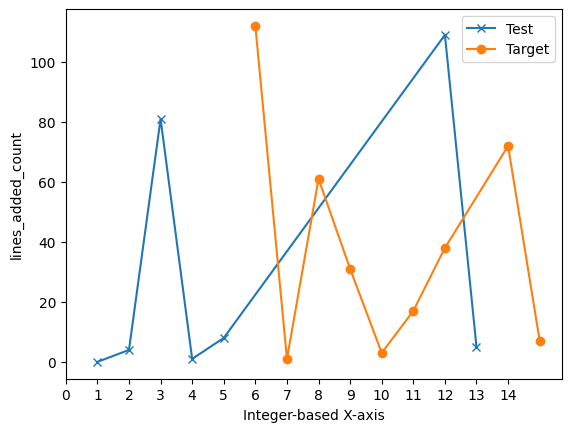

In [15]:
plot_test_vs_target_metric_numeric(adds_before['test'], adds_before['target'], "lines_added_count")

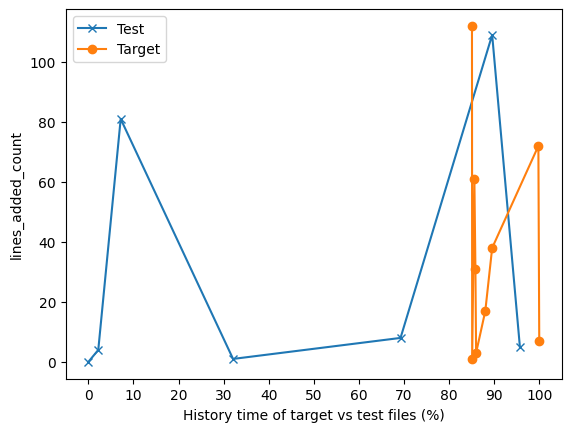

In [16]:
plot_lines_test_vs_target_normalise_100(adds_before['test'], adds_before['target'], 'lines_added_count')